In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px

<p style = "font-size: 13px; text-align: right; color: cadetblue" > August 2024, written by Irina Nedyalkova

<p style = "font-size: 27px; text-align: center; color: cadetblue" > Weather Data

This work should have been my Date and Time practice but the Wind Data catched my eye. Probably, not a surprise, wind is my favourite natural phenomenon. We can not see wind, just the things it moves. 

In [4]:
WEATHER_DATA = pd.read_csv("weather_data.csv")

In [5]:
WEATHER_DATA.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

- First, I take a look at the data.
- Second, I wrap it in a global variable (capital letters).
- Third, I see what columns do we have...
- For this project, I decide to drop some of the columns and work with just 4 of them.

In [6]:
df_weather = WEATHER_DATA.drop(axis = 1, columns = ["Dew Point Temp_C", "Rel Hum_%", "Visibility_km", "Press_kPa"]) 

I make a new dataframe. Here comes the importance of the global variable. Always know which your original dataframe is!

In [7]:
date_time = df_weather["Date/Time"]                                       # original Date/Time column

df_DT = pd.DataFrame(date_time)

I prefer to have clarity and take out just the column I want to split, the "Date/Time" column. 

In [8]:
date = pd.to_datetime(df_DT["Date/Time"]).dt.date                      # split to Date column

just_dates = pd.DataFrame(date)                                     

In [9]:
time = pd.to_datetime(df_DT["Date/Time"]).dt.time                    # split to Time column

just_time = pd.DataFrame(time)                                     

I keep the variables closed, because GitHub shows them in Large, and the data takes up too much space.

In [10]:
date_column = just_dates.rename(columns = {"Date/Time": "Date"})

In [11]:
time_column = just_time.rename(columns = {"Date/Time": "Time"})

Above, renamed the columns just as $Date$ and $Time$.

In [12]:
working_df = df_weather.drop(axis = 1, columns = "Date/Time")

I create, check for accuracy and wrap the data in a variable then.

In [13]:
working_df.insert(0, "Date", value = date_column)
working_df.insert(1, "Time", value = time_column)

In [14]:
#working_df

In [15]:
working_df.columns

Index(['Date', 'Time', 'Temp_C', 'Wind Speed_km/h', 'Weather'], dtype='object')

> My new DataFrame, which I will be working with, is ready! It has 5 columns and 8784 rows.

In [16]:
lowest_temp = working_df.nsmallest(11, "Temp_C")

In [17]:
lowest_temp.shape

(11, 5)

In [18]:
lowest_temp_wind = lowest_temp["Wind Speed_km/h"]

In [19]:
temp_at_lowest = lowest_temp["Temp_C"]

The lowest temperature is on 15.01.2012 with $11$ entries. Below, you see the visual presentation:

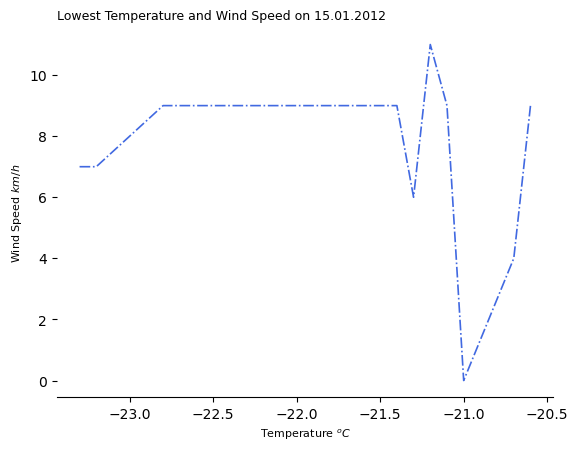

In [20]:
fig, ax = plt.subplots()

ax.plot(temp_at_lowest, lowest_temp_wind, linestyle = "dashdot", lw = 1.2, color = "royalblue")

# hide some axes lines
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# showing ticks
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

# labels
ax.set_xlabel("Temperature $^{o}C$", size = 8)
ax.set_ylabel("Wind Speed $km/h$", size = 8)
ax.set_title("Lowest Temperature and Wind Speed on 15.01.2012", size = 9, loc = "left")

# show
plt.show()

Wind is a vector quantity. It has a magnitude (wind_speed) and a direction (wind_direction). These data contains the magnitude in scalar value.

> On 15.01.2012 we have wind speed in range $0-11$ km/h:

In [21]:
df_wind_description_S = pd.DataFrame({"specifications": ["sea like a mirror", "sea shaken into waves", "we feel on face"],
                                    "wind_speed": ["0 - 1", "1 - 5", "6 - 11"],
                                    "description": ["calm", "light air", "light breeze"]})

In [22]:
df_wind_description_S.style.hide()    # hides index column

specifications,wind_speed,description
sea like a mirror,0 - 1,calm
sea shaken into waves,1 - 5,light air
we feel on face,6 - 11,light breeze


Now to explore how the wind behaves in the highest temperature...

In [23]:
working_df[(working_df["Temp_C"] >= 30)].shape

(68, 5)

There are $68$ entries for temperature above 30$^{o}C$ on different days.

In [24]:
df68_heat = working_df[(working_df["Temp_C"] >= 30)]

In [25]:
heat_temp = df68_heat["Temp_C"]

Checking min / max and mean:

In [26]:
[heat_temp.min(), heat_temp.max(), heat_temp.mean()]     # grad C

[30.0, 33.0, 31.217647058823527]

In [27]:
heat_wind = df68_heat["Wind Speed_km/h"]

Checking min / max and mean value of the wind during the most high temperatures:

In [28]:
[heat_wind.min(), heat_wind.max(), heat_wind.mean()]        # km/h

[4, 32, 18.0]

Here the visual presentation with 68 values above 30$^{o}C$:

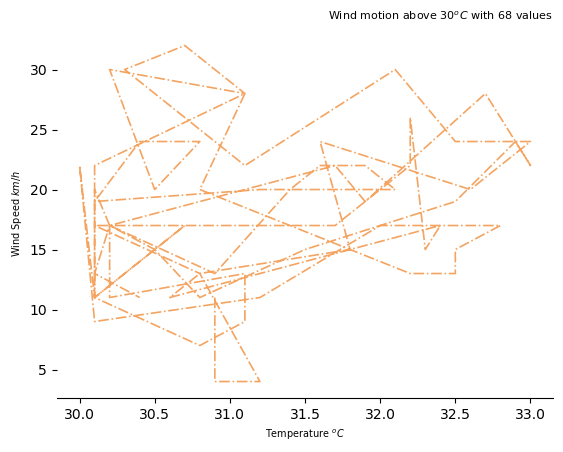

In [29]:
fig, ax = plt.subplots()

ax.plot(heat_temp, heat_wind, linestyle = "dashdot", lw = 1.2, color = "sandybrown")

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xlabel("Temperature $^{o}C$", size = 7)
ax.set_ylabel("Wind Speed $km/h$", size = 7)
ax.set_title("Wind motion above 30$^{o}C$ with 68 values", size = 8, loc = "right")

plt.show()

> Uh! A lot going on here :) Let's zoom in and test with less values:

In [30]:
working_df[(working_df["Temp_C"] >= 31)].shape

(35, 5)

Above 31$^{o}C$ we have 35 entries. I would like to compare with the same shape as the cold chart.

In [31]:
working_df[(working_df["Temp_C"] >= 32.4)].shape

(11, 5)

Here we go! Above 32.4$^{o}C$ there are exactly 11 entries I need for the hot/cold comparison.

In [32]:
df_heat_temp11 = working_df[(working_df["Temp_C"] >= 32.4)]

In [33]:
heat_temp11 = df_heat_temp11["Temp_C"]

In [34]:
heat_wind11 = df_heat_temp11["Wind Speed_km/h"]

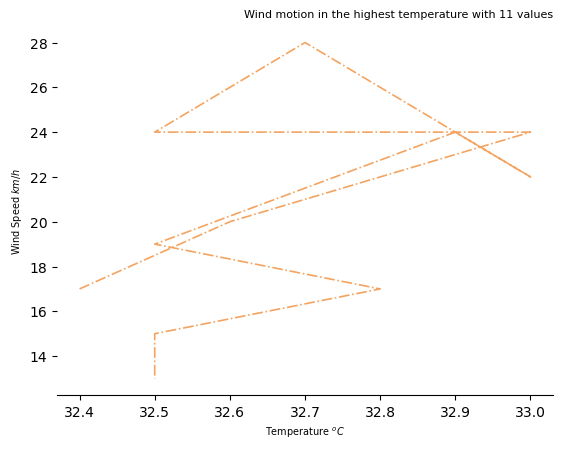

In [35]:
fig, ax = plt.subplots()

ax.plot(heat_temp11, heat_wind11, linestyle = "dashdot", lw = 1.2, color = "sandybrown")

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xlabel("Temperature $^{o}C$", size = 7)
ax.set_ylabel("Wind Speed $km/h$", size = 7)
ax.set_title("Wind motion in the highest temperature with 11 values", size = 8, loc = "right")

plt.show()

In [36]:
[heat_temp11.min(), heat_temp11.max()]                  # I always do some check if my chart is correct

[32.4, 33.0]

In [37]:
[heat_wind11.min(), heat_wind11.max()]                 # I always do some check if my chart is correct

[13, 28]

> The wind speed is much more different here, below a guide table:

In [38]:
df_wind_description_M = pd.DataFrame({"specifications": ["tree leaves in constant motion", "raises dust, moves small branches"],
                                        "wind_speed": ["13 - 19", "20 - 28"],
                                       "description": ["gentle breeze", "moderate breeze"]})

In [39]:
df_wind_description_M.style.hide()   # hides index column

specifications,wind_speed,description
tree leaves in constant motion,13 - 19,gentle breeze
"raises dust, moves small branches",20 - 28,moderate breeze


Okay, time to compare:

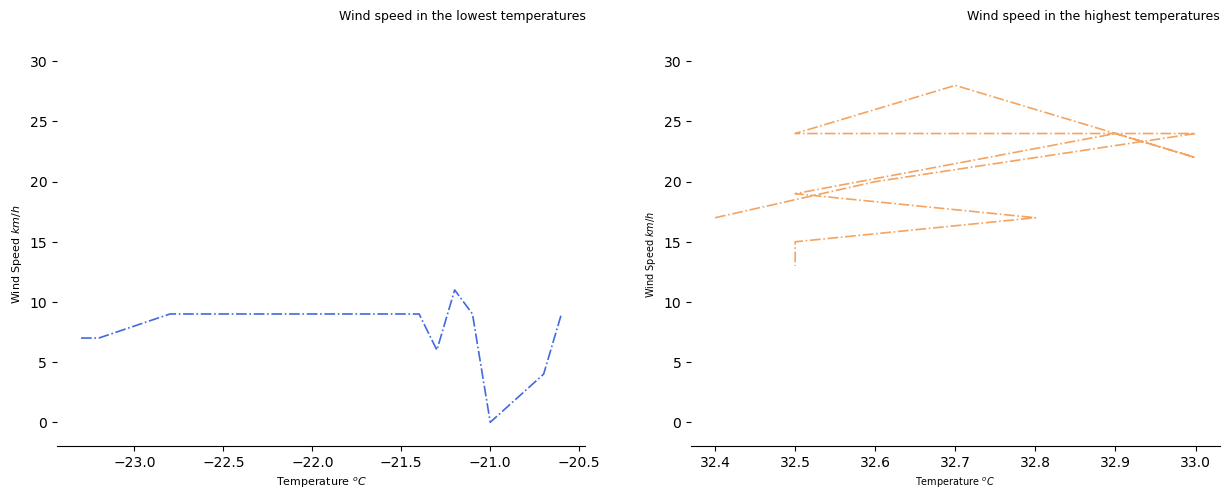

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

ax1.plot(temp_at_lowest, lowest_temp_wind, linestyle = "dashdot", lw = 1.2, color = "royalblue")
ax1.set_ylim(-2, 30)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.xaxis.set_ticks_position("bottom")
ax1.yaxis.set_ticks_position("left")
ax1.set_xlabel("Temperature $^{o}C$", size = 8)
ax1.set_ylabel("Wind Speed $km/h$", size = 8)
ax1.set_title("Wind speed in the lowest temperatures", size = 9, loc = "right", pad = 30)

ax2.plot(heat_temp11, heat_wind11, linestyle = "dashdot", lw = 1.2, color = "sandybrown")
ax2.set_ylim(-2, 30)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.xaxis.set_ticks_position("bottom")
ax2.yaxis.set_ticks_position("left")
ax2.set_xlabel("Temperature $^{o}C$", size = 7)
ax2.set_ylabel("Wind Speed $km/h$", size = 7)
ax2.set_title("Wind speed in the highest temperatures", size = 9, loc = "right", pad = 30)

plt.show()

In simple terms, wind is the movement of air. This movement is caused by pressure differences, which in turn were caused by temperature differences. It all starts with the sun :) As it gets warmer, the air expands and rises, leaving behind an area of low pressure. Then, the air will move from surrounding higher pressure areas to try even things out and it is this rush of air that results in wind. The bigger the pressure difference, the faster the air moves. But because of earth's rotation, that air does not flow directly from high to low pressure... instead it is deflected to the right.

From my personal experience, wind speed does note depend on temperature, it depends on location. Will continue tomorrow...

<p style = "font-size: 15px; text-align: left; color: gray" > (work in progress)

_____________________________________________________________________________________________________________________________

References:
1. The Royal Meteorological Society, UK: https://www.rmets.org/metmatters/what-wind